Hello there, glad you are here again. I would like to show you some of my learning methods: The Topics Mining. Albert Einstein once said: "Learn from yesterday, live for today, hope for tomorrow. The important thing is not to stop questioning.", the process of questioning causes me to think much in what topics I've been through or any of the coming up ones.\
According to that, in this notebook, I will show you the journey of questioning myself regarding the topic of Crabs Dataset.

In [1]:
# Import libraries in used
import pandas as pd               # For handling Dataframe
import numpy as np                # For handling Mathematic Matrices
import matplotlib.pyplot as plt   # For making bar graphs, charts, etc.
import seaborn as sns             # For handling data insights
from sklearn import linear_model  # For creating Linear Model

# Import methods and functions from libraries
from sklearn.preprocessing import StandardScaler      # For data standard scaling
from sklearn.model_selection import train_test_split  # For train/test splitting

# Import some basic learning methods
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron

In [2]:
# Turn off unecessary warnings from scikit-learn
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
#### THE DATASET ####
# Store data file path/URL
file_path = '/content/crabs.csv'       # From file path

# Read data from file path
crabs_rawdata = pd.read_csv(file_path) # Read the .csv file

# Dataset insights
crabs_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   speies     200 non-null    object 
 1   sex        200 non-null    object 
 2   index      200 non-null    int64  
 3   fontallip  200 non-null    float64
 4   rearwidth  200 non-null    float64
 5   length     200 non-null    float64
 6   width      200 non-null    float64
 7   depth      200 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 12.6+ KB


The summary shows that there are 200 instances (entries) and 8 columns of categories. Moreover, all categories contain fully the number of 200 data, there aren't any missing ones.

In [5]:
# Have a look
crabs_rawdata.head()

,speies,sex,index,fontallip,rearwidth,length,width,depth
0,B,M,1,8.1,6.7,16.1,19.0,7.0
1,B,M,2,8.8,7.7,18.1,20.8,7.4
2,B,M,3,9.2,7.8,19.0,22.4,7.7
3,B,M,4,9.6,7.9,20.1,23.1,8.2
4,B,M,5,9.8,8.0,20.3,23.0,8.2


In [6]:
# Data uniqueness - The Species
crabs_rawdata['speies'].unique()

array(['B', 'O'], dtype=object)

In [7]:
# Data uniqueness - The Sex
crabs_rawdata['sex'].unique()

array(['M', 'F'], dtype=object)

Each 'object' typed data contains only 2 classes, for the species there are only B or not B (the O). For the case of 'sex', there are only F=Female or M=Male.

In [8]:
# Considering only the numeric attributes of data
crabs_notext = crabs_rawdata.drop(['speies', 'sex', 'index'], axis=True)

# Have a look of new set
crabs_notext.head()

,fontallip,rearwidth,length,width,depth
0,8.1,6.7,16.1,19.0,7.0
1,8.8,7.7,18.1,20.8,7.4
2,9.2,7.8,19.0,22.4,7.7
3,9.6,7.9,20.1,23.1,8.2
4,9.8,8.0,20.3,23.0,8.2


<Axes: >

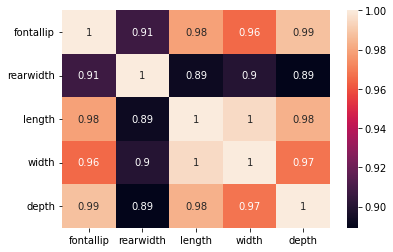

In [9]:
# Numeric data correlation
crabs_datacorr = crabs_notext.corr()

# Heat map pltting
sns.heatmap(crabs_datacorr, annot=True)

Voilà! We are observing strong linearity between every pair of attributes. Their correlations are truly close to 1, which indicates the strong linearity relations. Hmm let's see some first high linearity pairs: fontallip-depth, length-depth, width-depth, fontallip-width

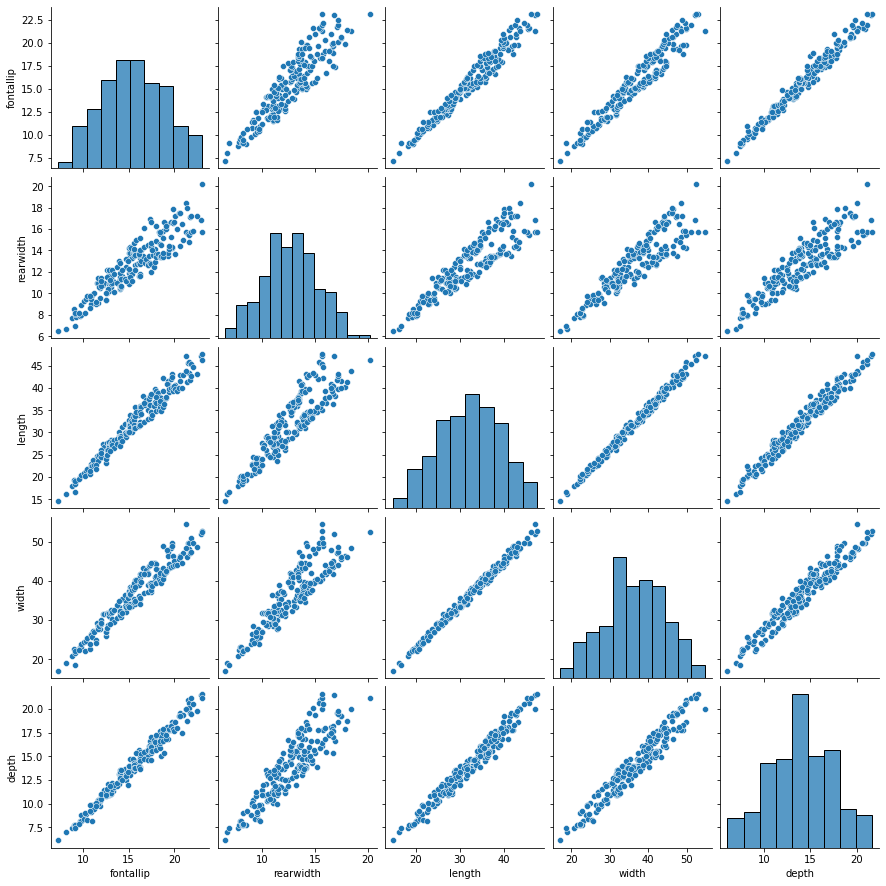

In [10]:
# Dataset pairs plot
sns.pairplot(crabs_notext)

I will firstly create some classification models such as: B typed Male or Female, O typed Male or Female, Male of O or B, Female of O or B, and even more

**HOW TO ENCODE YOU CLASSES? DOWN HERE!**

In [11]:
# Encode the text target and convert them into the numeric
crabs_sextarget = pd.DataFrame(crabs_rawdata['sex'])    # Sex encoding
crabs_sextarget[crabs_sextarget['sex']=='M'] = 1        # Male=1
crabs_sextarget[crabs_sextarget['sex']=='F'] = 0        # Female=1
crabs_sextarget = pd.to_numeric(crabs_sextarget['sex'], downcast='integer')

crabs_spctarget = pd.DataFrame(crabs_rawdata['speies'])    # Species encoding
crabs_spctarget[crabs_spctarget['speies']=='B'] = 1        # B=1
crabs_spctarget[crabs_spctarget['speies']=='O'] = 0        # O=1
crabs_spctarget = pd.to_numeric(crabs_spctarget['speies'], downcast='integer')

In [12]:
crabs_spctarget.info()

<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: speies
Non-Null Count  Dtype
--------------  -----
200 non-null    int8 
dtypes: int8(1)
memory usage: 328.0 bytes


In [13]:
crabs_sextarget.info()

<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: sex
Non-Null Count  Dtype
--------------  -----
200 non-null    int8 
dtypes: int8(1)
memory usage: 328.0 bytes


In [81]:
#### Binary Classification Based on Two Attributes ####
## Parameters:
# Attribute 01:    attr_01
# Attribute 02:    attr_02
# Target class:    target_class (must be pre-encoded first)
# Learning method: learn_method (must be pre-defined first outside)
# Test set size  : testsize
# Print scores?  : res_print (1=Yes, 0=No)
# Plot boundary? : decision_bound(1=Yes, 0=No)
  # X-axis label: x_lab (must be a string data)
  # Y-axis label: y_lab (must be a string data)
  # Plot legend : plt_legend (must be a list of legend)

## Returns
# Trained model       : classify_model
# Scores (train-test) : train_score, test_score

def binTwoAttrClassify(attr_01, attr_02, target_class, learn_method, testsize, res_print, decision_bound, x_lab, y_lab, plt_legend):
  ####### MODEL, DATA AND SCORES #######
  # Create the set for training and validating
  x_data = pd.DataFrame([attr_01, attr_02]).T   # Numeric values required
  y_data = pd.DataFrame(target_class)           # Numeric values required
  #print("X Data Dimension:", x_data.shape)

  # Split the original data to train and test
  x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=testsize, random_state=0)

  # Create model
  classify_model = learn_method

  # Train the model and evaluate
  classify_model.fit(x_train, y_train)

  train_score = classify_model.score(x_train, y_train)
  test_score  = classify_model.score(x_test, y_test)
  
  # Print or not?
  if res_print==1:
    print("Train score:", train_score)
    print("Test score:",  test_score)
  else:
    print("No scores required")

  ####### DECISION BOUNDARY #######
  def decisionBoundary(min1, max1, min2, max2, lensize, trained_model, plt_len, plt_wid):
    len_size = lensize
    x1_range_other  = np.linspace(min1, max1, len_size).reshape(len_size, 1)
    x2_range_other  = np.linspace(min2, max2, len_size).reshape(len_size, 1)
    pred_val_other  = np.zeros((len_size, len_size))
    
    # Combine every x-y and make prediction to finally classify them
      # Loop starts
    for i in range(len_size):
      for j in range(len_size):
        pred_val_other[i, j] = trained_model.predict([[x1_range_other[i, 0], x2_range_other[j, 0]]]).max()
      # Loop ends

    # Create meshgrid and plot decision boundary for clusters
      # Add figure window and axes
    figure = plt.figure(figsize = [plt_len, plt_wid])
    ax = figure.add_axes([0, 0, 1, 1])
      # Create mesh and contouring
    mesh_l, mesh_w = np.meshgrid(x1_range_other, x2_range_other)
    contour_set = ax.contourf(mesh_l, mesh_w, pred_val_other.T, cmap=plt.cm.summer_r, alpha=0.8)
      # Scatter data points
    class01 = ax.scatter(attr_01[target_class==1], attr_02[target_class==1], marker='o', color='green')    # Class 01
    class02 = ax.scatter(attr_01[target_class==0], attr_02[target_class==0], marker='x', color='red')      # Class 02
    ax.set_xlabel(x_lab)
    ax.set_ylabel(y_lab)
    ax.legend([class01, class02], plt_legend)
    plt.show()

  # Plot boundary or not?
  if decision_bound==1:
    #### The Limits ####
    min_attr1 = np.amin(attr_01)    # Min/Max of attribute 01
    max_attr1 = np.amax(attr_01)
    min_attr2 = np.amin(attr_02)    # Min/Max of attribute 02
    max_attr2 = np.amax(attr_02)

    # Make plot
    decisionBoundary(min_attr1, max_attr1, min_attr2, max_attr2, 100, classify_model, 10, 10)

  else:
    print("No plot required")
  
  # Return values
  return classify_model, train_score, test_score


**CLASSIFICATION BASED ON CRABS FONTALLIP AND DEPTH DATA**

Train score: 0.5
Test score: 0.5


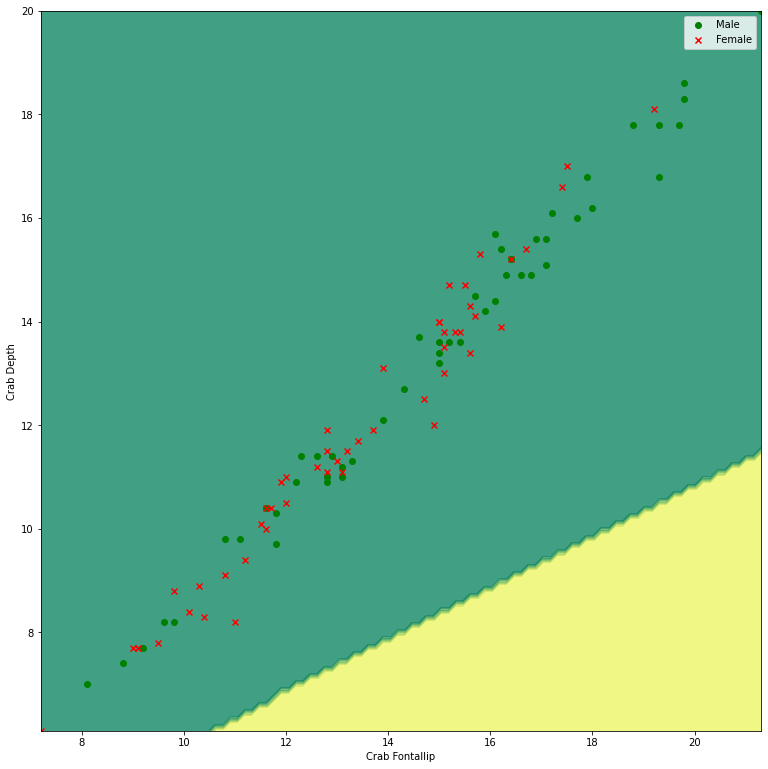

(Perceptron(eta0=0.3, max_iter=950), 0.5, 0.5)

In [82]:
# Pre-defined model
percep_model = Perceptron(eta0 = 0.3, max_iter=950)
fontallip_Btyped = pd.DataFrame(crabs_notext['fontallip'][crabs_rawdata['speies']=='B'])
depth_Btyped     = pd.DataFrame(crabs_notext['depth'][crabs_rawdata['speies']=='B'])

crabs_sextargetB = pd.DataFrame(crabs_rawdata['sex'][crabs_rawdata['speies']=='B'])    # B typed sex encoding
crabs_sextargetB[crabs_sextargetB['sex']=='M'] = 1        # Male=1
crabs_sextargetB[crabs_sextargetB['sex']=='F'] = 0        # Female=1
crabs_sextargetB = pd.to_numeric(crabs_sextargetB['sex'], downcast='integer')

# Classify a typed crab sex
binTwoAttrClassify(fontallip_Btyped['fontallip'], depth_Btyped['depth'], crabs_sextargetB, percep_model, 
                   0.20, 1, 1, 'Crab Fontallip', 'Crab Depth', ['Male', 'Female'])

What a bad result of Perceptron model!

**CLASSIFICATION BASED ON CRABS FONTALLIP AND LENGTH DATA WITH LOGISTIC REGRESSION**

Train score: 0.6933333333333334
Test score: 0.56


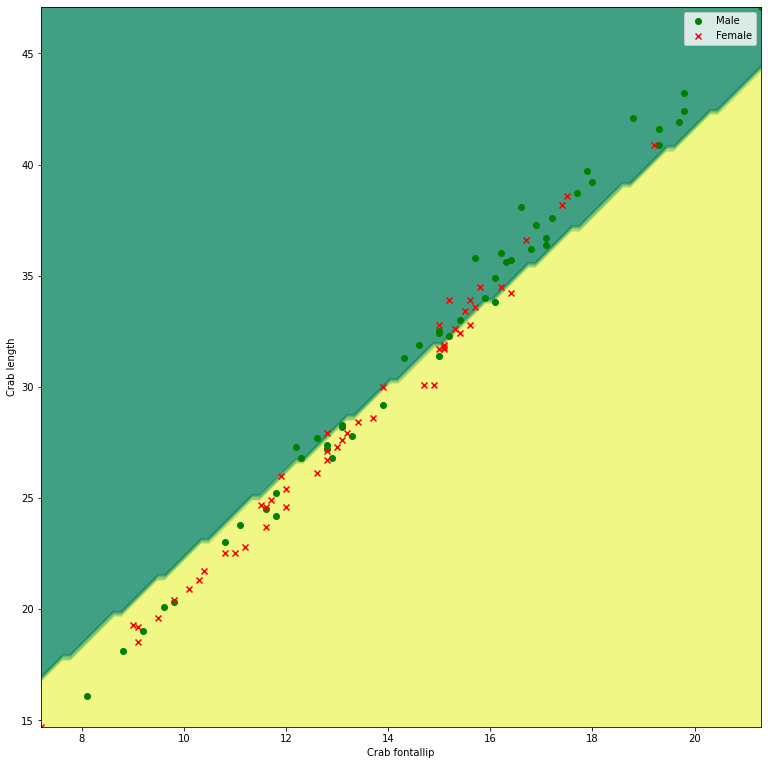

(LogisticRegression(max_iter=350), 0.6933333333333334, 0.56)

In [83]:
# Pre-defined model
log_model = LogisticRegression(max_iter=350)
fontallip_Btyped = pd.DataFrame(crabs_notext['fontallip'][crabs_rawdata['speies']=='B'])
length_Btyped    = pd.DataFrame(crabs_notext['length'][crabs_rawdata['speies']=='B'])

crabs_sextargetB = pd.DataFrame(crabs_rawdata['sex'][crabs_rawdata['speies']=='B'])    # B typed sex encoding
crabs_sextargetB[crabs_sextargetB['sex']=='M'] = 1        # Male=1
crabs_sextargetB[crabs_sextargetB['sex']=='F'] = 0        # Female=1
crabs_sextargetB = pd.to_numeric(crabs_sextargetB['sex'], downcast='float')

# Classify a typed crab sex
binTwoAttrClassify(fontallip_Btyped['fontallip'], length_Btyped['length'], crabs_sextargetB,
                   log_model, 0.25, 1, 1, 'Crab fontallip', 'Crab length', ['Male', 'Female'])

Quite a boundary huh!

**CLASSIFICATION BASED ON CRABS REARWIDTH AND DEPTH DATA WITH LOGISTIC REGRESSION** 

Train score: 0.9125
Test score: 0.9


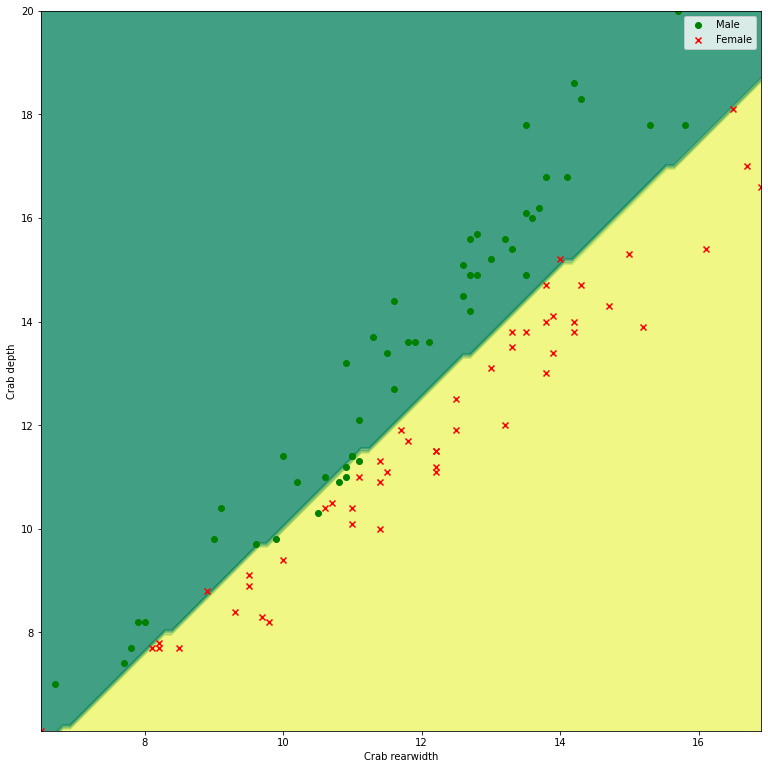

(LogisticRegression(max_iter=450), 0.9125, 0.9)

In [84]:
# Pre-defined model
log_model = LogisticRegression(max_iter=450)
attr1_Btyped = pd.DataFrame(crabs_notext['rearwidth'][crabs_rawdata['speies']=='B'])
attr2_Btyped = pd.DataFrame(crabs_notext['depth'][crabs_rawdata['speies']=='B'])

crabs_sextargetB = pd.DataFrame(crabs_rawdata['sex'][crabs_rawdata['speies']=='B'])    # B typed sex encoding
crabs_sextargetB[crabs_sextargetB['sex']=='M'] = 1        # Male=1
crabs_sextargetB[crabs_sextargetB['sex']=='F'] = 0        # Female=1
crabs_sextargetB = pd.to_numeric(crabs_sextargetB['sex'], downcast='float')

# Classify a typed crab sex
binTwoAttrClassify(attr1_Btyped ['rearwidth'], attr2_Btyped['depth'], crabs_sextargetB,
                   log_model, 0.20, 1, 1, 'Crab rearwidth', 'Crab depth', ['Male', 'Female'])

Hmmm, this model truly made my day! ;). Let's retry to classify the sex of B typed based on fontallip and depth, but using the Logistic Regression

**CLASSIFICATION BASED ON CRABS FONTALLIP AND DEPTH DATA WITH LOGISTIC REGRESSION** 

Train score: 0.6125
Test score: 0.5


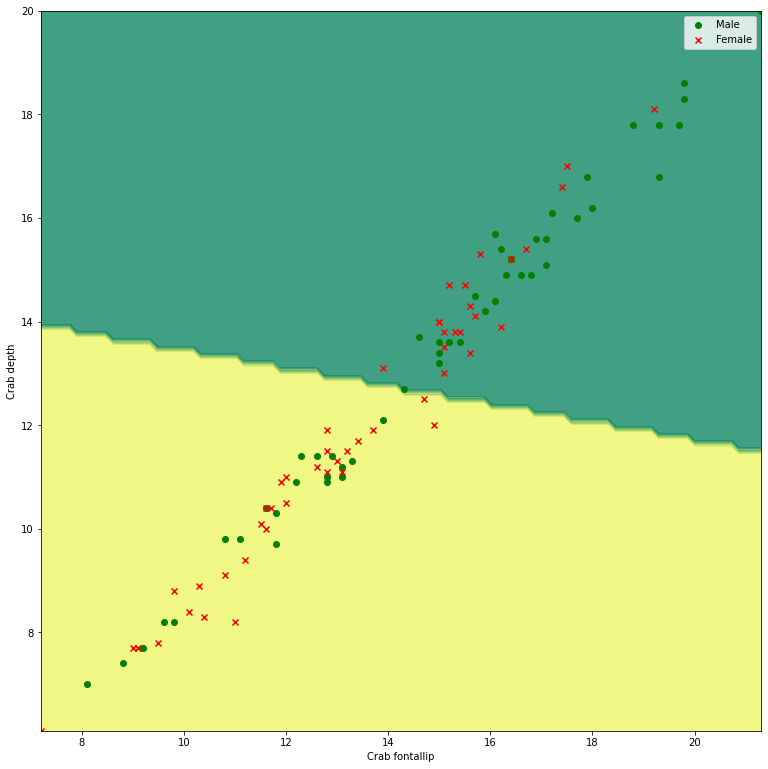

(LogisticRegression(max_iter=1000), 0.6125, 0.5)

In [85]:
# Pre-defined model
log_model = LogisticRegression(max_iter=1000)
attr1_Btyped = pd.DataFrame(crabs_notext['fontallip'][crabs_rawdata['speies']=='B'])
attr2_Btyped = pd.DataFrame(crabs_notext['depth'][crabs_rawdata['speies']=='B'])

crabs_sextargetB = pd.DataFrame(crabs_rawdata['sex'][crabs_rawdata['speies']=='B'])    # B typed sex encoding
crabs_sextargetB[crabs_sextargetB['sex']=='M'] = 1        # Male=1
crabs_sextargetB[crabs_sextargetB['sex']=='F'] = 0        # Female=1
crabs_sextargetB = pd.to_numeric(crabs_sextargetB['sex'], downcast='float')

# Classify a typed crab sex
binTwoAttrClassify(attr1_Btyped ['fontallip'], attr2_Btyped['depth'], crabs_sextargetB,
                   log_model, 0.20, 1, 1, 'Crab fontallip', 'Crab depth', ['Male', 'Female'])

Hmmm, still bad :((. \
 Based on this problem, it's stated that it's possible to make predictions, not to classify the classes. Or another way to broadcast this problem, as we can see MOST of the greens (Male) gather on the top of the boundary, and some more below, and the algorithm learned to classify the most.\
 Moreover, the accuracy scores also show what is happening here, with the value of 0.6125 in training, as mentioned, the model learned the most case and mis-classify about 40% of those cases below the boundary

Let's make classifier with even larger, in this case, no typed required, only male or female based on rearwidth and depth data

**CLASSIFICATION BASED ON CRABS REARWIDTH AND DEPTH DATA WITH LOGISTIC REGRESSION** 

Train score: 0.90625
Test score: 0.85


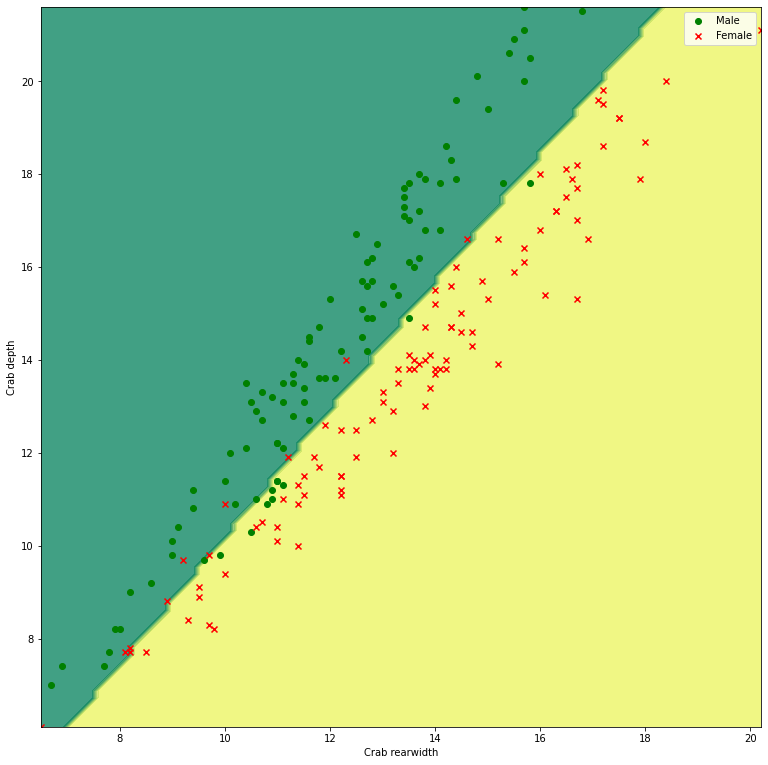

(LogisticRegression(max_iter=850), 0.90625, 0.85)

In [86]:
# Pre-defined model
log_model = LogisticRegression(max_iter=850)
attr1_typed = pd.DataFrame(crabs_notext['rearwidth'])
attr2_typed = pd.DataFrame(crabs_notext['depth'])

crabs_sextarget = pd.DataFrame(crabs_rawdata['sex']) 
crabs_sextarget[crabs_sextarget['sex']=='M'] = 1        # Male=1
crabs_sextarget[crabs_sextarget['sex']=='F'] = 0        # Female=1
crabs_sextarget= pd.to_numeric(crabs_sextarget['sex'], downcast='float')

# Classify a typed crab sex
binTwoAttrClassify(attr1_typed['rearwidth'], attr2_typed['depth'], crabs_sextarget,
                   log_model, 0.20, 1, 1, 'Crab rearwidth', 'Crab depth', ['Male', 'Female'])

This time, we work on the rearwidth-width relation\
As we can see, the higher the convergence of data be, the harder classification problems for the model to handle. For this case, the rate of data convergence is small as the points of each class are quite far to each other

**CLASSIFICATION BASED ON CRABS REARWIDTH AND WIDTH DATA WITH LOGISTIC REGRESSION** 

Train score: 0.94375
Test score: 0.9


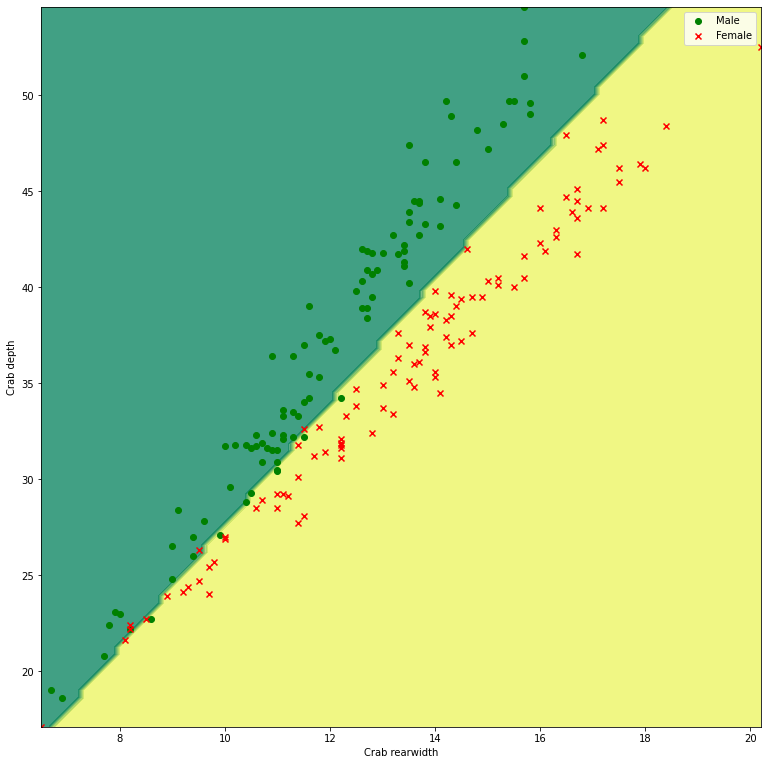

(LogisticRegression(max_iter=850), 0.94375, 0.9)

In [87]:
# Pre-defined model
log_model = LogisticRegression(max_iter=850)
attr1_typed = pd.DataFrame(crabs_notext['rearwidth'])
attr2_typed = pd.DataFrame(crabs_notext['width'])

crabs_sextarget = pd.DataFrame(crabs_rawdata['sex']) 
crabs_sextarget[crabs_sextarget['sex']=='M'] = 1        # Male=1
crabs_sextarget[crabs_sextarget['sex']=='F'] = 0        # Female=1
crabs_sextarget= pd.to_numeric(crabs_sextarget['sex'], downcast='float')

# Classify a typed crab sex
binTwoAttrClassify(attr1_typed['rearwidth'], attr2_typed['width'], crabs_sextarget,
                   log_model, 0.20, 1, 1, 'Crab rearwidth', 'Crab depth', ['Male', 'Female'])

**CLASSIFICATION BASED ON CRABS REARWIDTH AND WIDTH DATA WITH LOGISTIC REGRESSION** 

Train score: 0.6125
Test score: 0.625


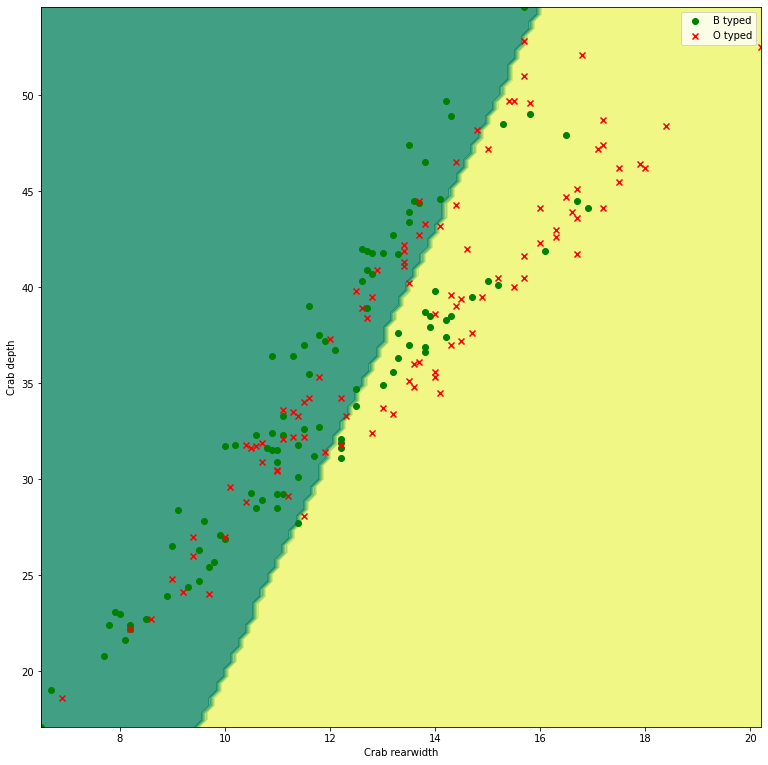

(LogisticRegression(max_iter=950), 0.6125, 0.625)

In [88]:
#### The types #####

# Pre-defined model
log_model = LogisticRegression(max_iter=950)
attr1_typed = pd.DataFrame(crabs_notext['rearwidth'])
attr2_typed = pd.DataFrame(crabs_notext['width'])

crabs_target = pd.DataFrame(crabs_rawdata['speies']) 
crabs_target[crabs_target['speies']=='B'] = 1        # B=1
crabs_target[crabs_target['speies']=='O'] = 0        # O=1
crabs_target= pd.to_numeric(crabs_target['speies'], downcast='float')

# Classify a typed crab sex
binTwoAttrClassify(attr1_typed['rearwidth'], attr2_typed['width'], crabs_target,
                   log_model, 0.20, 1, 1, 'Crab rearwidth', 'Crab depth', ['B typed', 'O typed'])

**CLASSIFICATION BASED ON CRABS FONTALLIP AND RWIDTH DATA WITH LOGISTIC REGRESSION** 

Train score: 0.99375
Test score: 1.0


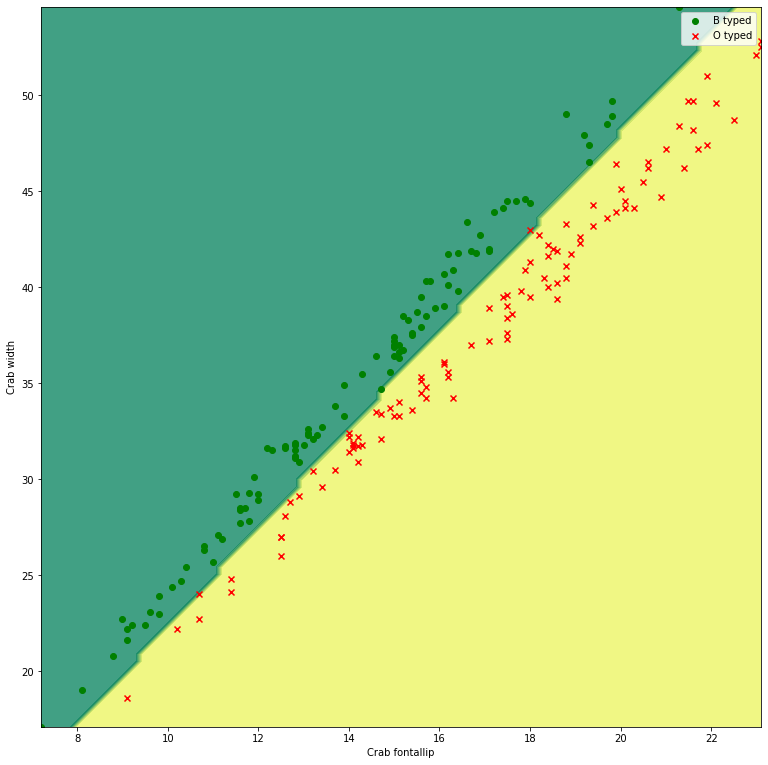

(LogisticRegression(max_iter=950), 0.99375, 1.0)

In [89]:
# Pre-defined model
log_model = LogisticRegression(max_iter=950)
attr1_typed = pd.DataFrame(crabs_notext['fontallip'])
attr2_typed = pd.DataFrame(crabs_notext['width'])

crabs_target = pd.DataFrame(crabs_rawdata['speies']) 
crabs_target[crabs_target['speies']=='B'] = 1        # B=1
crabs_target[crabs_target['speies']=='O'] = 0        # O=1
crabs_target= pd.to_numeric(crabs_target['speies'], downcast='float')

# Classify a typed crab sex
binTwoAttrClassify(attr1_typed['fontallip'], attr2_typed['width'], crabs_target,
                   log_model, 0.20, 1, 1, 'Crab fontallip', 'Crab width', ['B typed', 'O typed'])

WOW, 100% of accuracy!!!!!!!!! What an overfitted model :)

**CLASSIFICATION BASED ON CRABS FONTALLIP AND DEPTH DATA WITH LOGISTIC REGRESSION** 

Train score: 0.675
Test score: 0.675


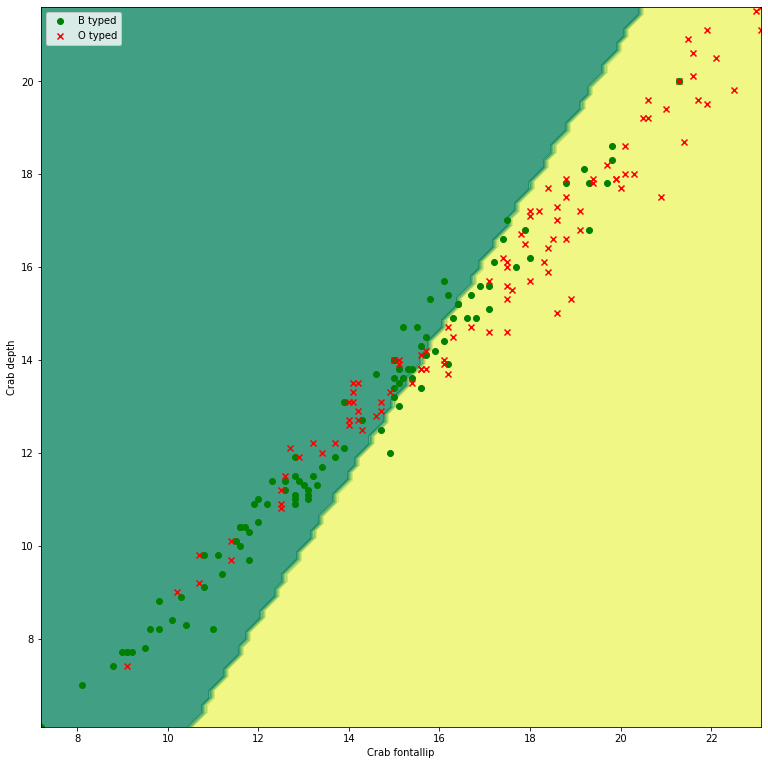

(LogisticRegression(max_iter=950), 0.675, 0.675)

In [90]:
# Pre-defined model
log_model = LogisticRegression(max_iter=950)
attr1_typed = pd.DataFrame(crabs_notext['fontallip'])
attr2_typed = pd.DataFrame(crabs_notext['depth'])

crabs_target = pd.DataFrame(crabs_rawdata['speies']) 
crabs_target[crabs_target['speies']=='B'] = 1        # B=1
crabs_target[crabs_target['speies']=='O'] = 0        # O=1
crabs_target= pd.to_numeric(crabs_target['speies'], downcast='float')

# Classify a typed crab sex
binTwoAttrClassify(attr1_typed['fontallip'], attr2_typed['depth'], crabs_target,
                   log_model, 0.20, 1, 1, 'Crab fontallip', 'Crab depth', ['B typed', 'O typed'])

This case is just like the previous problem of the most gathering points beyond the boundary

**CLASSIFICATION BASED ON CRABS WIDTH AND DEPTH DATA WITH LOGISTIC REGRESSION** 

Train score: 0.9875
Test score: 0.95


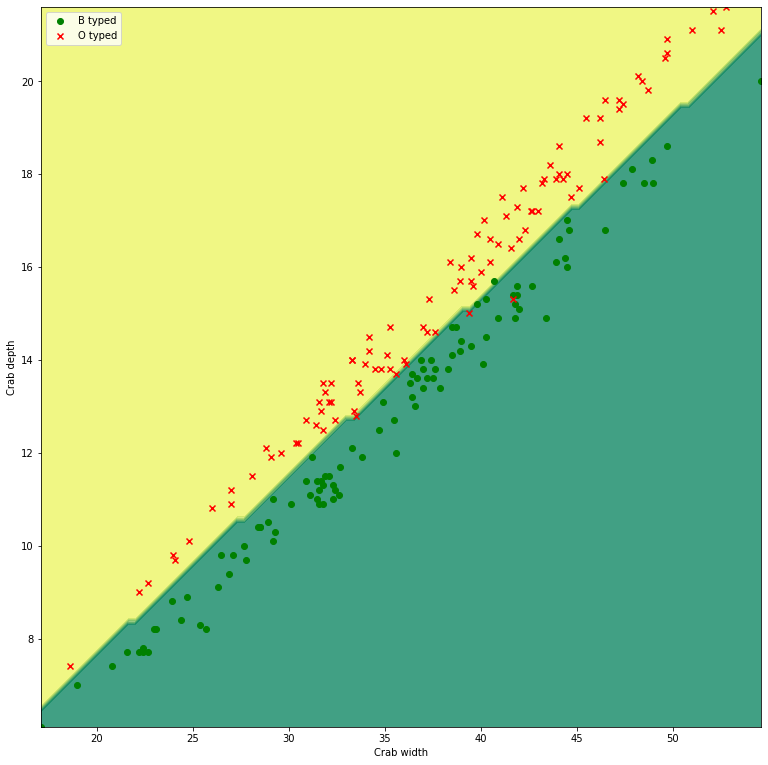

(LogisticRegression(max_iter=950), 0.9875, 0.95)

In [91]:
# Pre-defined model
log_model = LogisticRegression(max_iter=950)
attr1_typed = pd.DataFrame(crabs_notext['width'])
attr2_typed = pd.DataFrame(crabs_notext['depth'])

crabs_target = pd.DataFrame(crabs_rawdata['speies']) 
crabs_target[crabs_target['speies']=='B'] = 1        # B=1
crabs_target[crabs_target['speies']=='O'] = 0        # O=1
crabs_target= pd.to_numeric(crabs_target['speies'], downcast='float')

# Classify a typed crab sex
binTwoAttrClassify(attr1_typed['width'], attr2_typed['depth'], crabs_target,
                   log_model, 0.20, 1, 1, 'Crab width', 'Crab depth', ['B typed', 'O typed'])

**3-DIMENSIONAL CLASSIFIER**

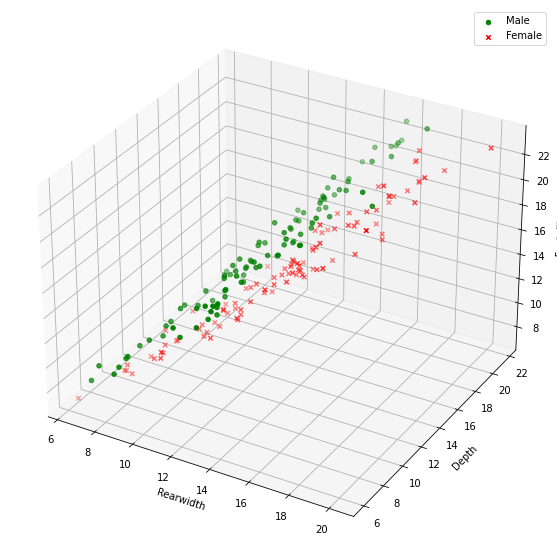

In [122]:
# Create 3 attributes
attr1_typed = pd.DataFrame(crabs_notext['rearwidth'])
attr2_typed = pd.DataFrame(crabs_notext['depth'])
attr3_typed = pd.DataFrame(crabs_notext['fontallip'])

crabs_sextarget = pd.DataFrame(crabs_rawdata['sex']) 
crabs_sextarget[crabs_sextarget['sex']=='M'] = 1        # Male=1
crabs_sextarget[crabs_sextarget['sex']=='F'] = 0        # Female=1
crabs_sextarget= pd.to_numeric(crabs_sextarget['sex'], downcast='float')

# Create 3D plot in matplot
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection='3d')
ax.scatter(attr1_typed['rearwidth'][crabs_sextarget==1], attr2_typed['depth'][crabs_sextarget==1],    # Male
            attr3_typed['fontallip'][crabs_sextarget==1], marker='o', color='green')

ax.scatter(attr1_typed['rearwidth'][crabs_sextarget==0], attr2_typed['depth'][crabs_sextarget==0],    # Female
            attr3_typed['fontallip'][crabs_sextarget==0], marker='x', color='red')
ax.set_xlabel('Rearwidth')
ax.set_ylabel('Depth')
ax.set_zlabel('Fontallip')
ax.legend(['Male', 'Female'])

# Show plot
plt.show()

In [93]:
# Create model or the 3 categories
log_model_3attrs = LogisticRegression(max_iter=950)

# Create x set and y set
x_set_3attrs = crabs_notext[['rearwidth', 'depth', 'fontallip']]
y_set_3attrs = crabs_sextarget.T

# Train-Test split
x_train_3attr, x_test_3attr, y_train_3attr, y_test_3attr = train_test_split(x_set_3attrs, y_set_3attrs, test_size=0.2, random_state=0)

In [94]:
# Train the Logistic Model for 3 categories
log_model_3attrs.fit(x_train_3attr, y_train_3attr)

# Evaluation scores
train_score = log_model_3attrs.score(x_train_3attr, y_train_3attr)
test_score  = log_model_3attrs.score(x_test_3attr, y_test_3attr)

# Display results
print("Train score:", train_score)
print("Test score:", test_score)

Train score: 0.90625
Test score: 0.9


**TO BE CONTINUED**